<a href="https://colab.research.google.com/github/KoheiMinoda/Ocean_Engineering/blob/main/ex3_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#loading data calculated by wnumber.f
xy = pd.read_csv("Kh_vs_kh.csv")
Kh = np.array(xy['Kh'])
kh = np.array(xy['kh'])

In [6]:
# calculate kh using approximate formula (3.3.11)
D=np.arange(0.01,5.0,0.01)
x=np.sqrt(D*(D+1./(1.+D*(0.6522+D*(0.4622+D**2*(0.0864+0.0675*D))))))

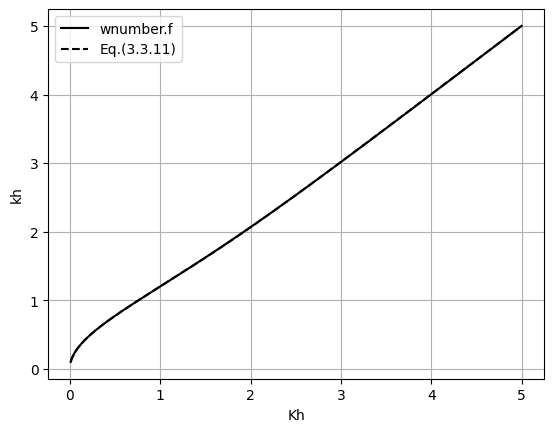

In [7]:
# plot graph of Kh vs kh
fig1 = plt.figure()
plt.plot(Kh,kh,ls='-',c='k',label='wnumber.f')
plt.plot(D,x,ls='--',c='k',label='Eq.(3.3.11)')
plt.xlabel('Kh')
plt.ylabel('kh')
plt.grid()
plt.legend()
plt.show()
fig1.savefig("Fig3-4.pdf")

In [8]:
# plot absolute error
fig2 = plt.figure()
Kh_exact=kh*np.tanh(kh)
Kh_error=abs(Kh-Kh_exact)
dKh_dkh=np.tanh(kh)+kh*(1./np.cosh(kh))**2
kh_error=Kh_error/dKh_dkh

<Figure size 640x480 with 0 Axes>

In [9]:
D_exact=x*np.tanh(x)
D_error=abs(D-D_exact)
dD_dx=np.tanh(x)+x*(1./np.cosh(x))**2
x_error=D_error/dD_dx

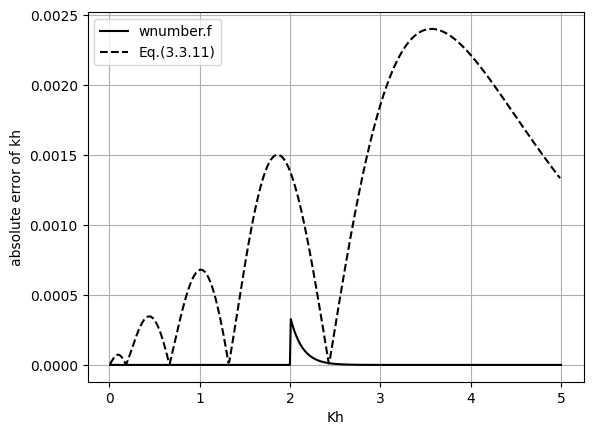

In [10]:
plt.plot(Kh,kh_error,ls='-',c='k',label='wnumber.f')
plt.plot(D,x_error,ls='--',c='k',label='Eq.(3.3.11)')
plt.xlabel('Kh')
plt.ylabel('absolute error of kh')
plt.grid()
plt.legend()
plt.show()
fig2.savefig("Fig3-5.pdf")

In [11]:
# plot relative error
fig3 = plt.figure()
kh_rerror=kh_error/kh
x_rerror=x_error/x

<Figure size 640x480 with 0 Axes>

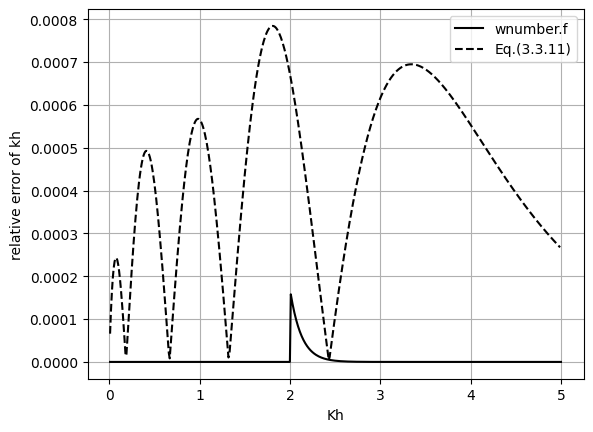

In [12]:
plt.plot(Kh,kh_rerror,ls='-',c='k',label='wnumber.f')
plt.plot(D,x_rerror,ls='--',c='k',label='Eq.(3.3.11)')
plt.xlabel('Kh')
plt.ylabel('relative error of kh')
plt.grid()
plt.legend()
plt.show()
fig3.savefig("Fig3-6.pdf")